In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('student_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [3]:
df.rename(columns={'G1': 'Grade1', 'G2': 'Grade2','G3':'Final_Grade'},inplace=True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade1,Grade2,Final_Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
df.isnull().sum()

school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
Grade1         0
Grade2         0
Final_Grade    0
dtype: int64

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Grade1,Grade2,Final_Grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

print(f'Numerical Variables\n')
display(num.head())

print(f'Categorical Variables\n')
display(cat.head())

Numerical Variables



,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Grade1,Grade2,Final_Grade
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


Categorical Variables



,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'Grade1', 'Grade2', 'Final_Grade'],
      dtype='object')

VISUALIZATION

<Axes: xlabel='school', ylabel='count'>

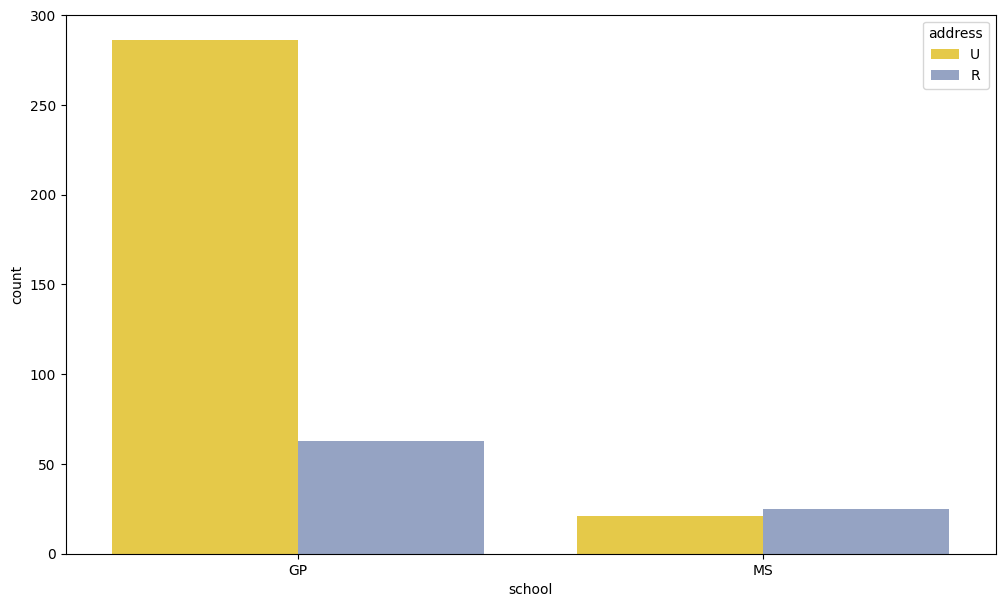

In [8]:
# School with address

plt.figure(figsize =(12,7))
sns.countplot(data=df, x='school', hue='address', palette = 'Set2_r')

<Axes: xlabel='age', ylabel='count'>

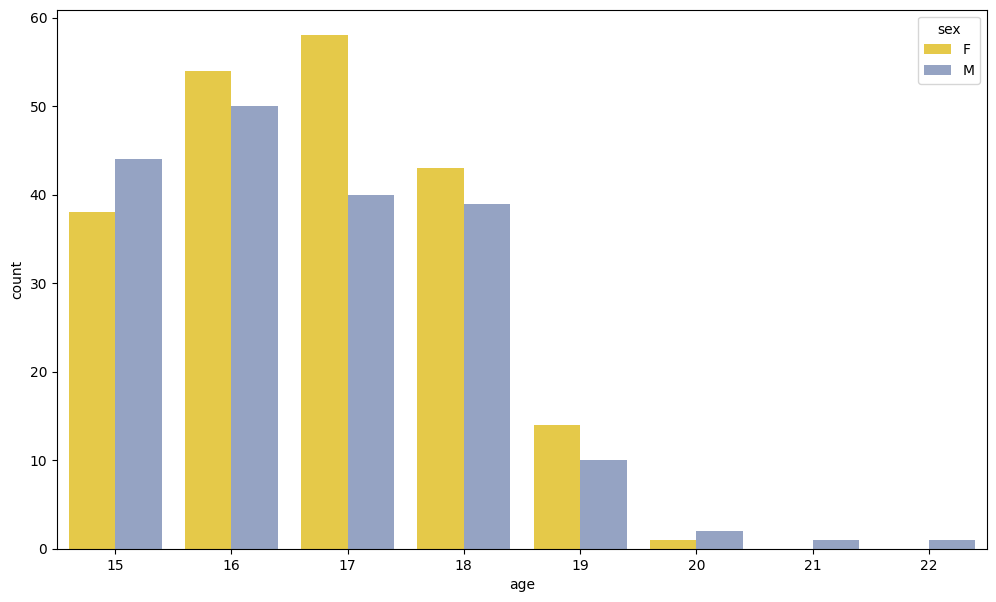

In [9]:
# Number of Student in different age group

plt.figure(figsize =(12,7))
sns.countplot(data=df, x='age', hue='sex', palette = 'Set2_r')

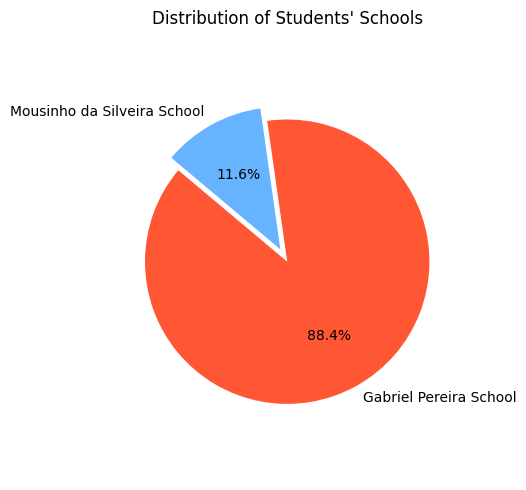

In [10]:
# Percentage of student 

# Calculate percentage values
total = len(df)
value_counts = df['school'].value_counts()
percentages = value_counts / total * 100

# Rename the labels from 'GP' and 'MS' to custom names
value_counts.index = ['Gabriel Pereira School', 'Mousinho da Silveira School']

# Define custom colors
custom_colors = ['#ff5733', '#66b3ff']  # A vibrant red and a bright blue

# Define an explode parameter to separate one of the sections
explode = (0.1, 0)  # This will explode the first section (Gabriel Pereira School) slightly

# Create a pie chart with custom colors and explode parameter
plt.figure(figsize=(5, 5))
plt.pie(
    percentages,
    labels=value_counts.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=custom_colors,
    explode=explode  # Add the explode parameter here
)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title("Distribution of Students' Schools")

# Show the plot
plt.tight_layout()
plt.show()

<Axes: >

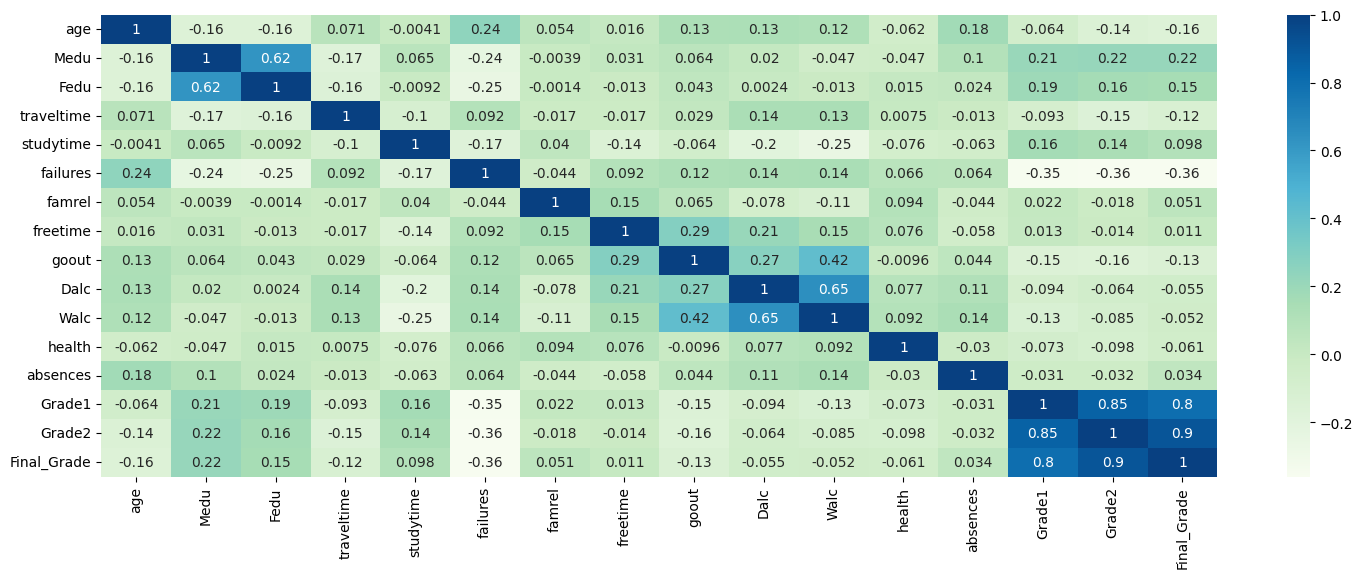

In [11]:
plt.figure(figsize = (18, 6))
sns.heatmap(num.corr(), annot = True, cmap = 'GnBu')

DATA PREPROCESSING

In [6]:
from sklearn.model_selection import train_test_split

x = df.drop('school', axis = 1)
y = df.Final_Grade

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.10, random_state = 7)
print(f'xtrain: {xtrain.shape}')
print(f'xtest: {xtest.shape}')
print('ytrain: {}'.format(ytrain.shape))
print('ytest: {}'.format(ytest.shape))

xtrain: (355, 32)
xtest: (40, 32)
ytrain: (355,)
ytest: (40,)


In [7]:
train = pd.concat([xtrain, ytrain], axis = 1)
test = pd.concat([xtest, ytest], axis = 1)

print(f'Train Set')
display(train.head())

print(f'\n\nTest Set')
display(test.head())

Train Set


,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade1,Grade2,Final_Grade,Final_Grade
210,F,19,U,GT3,T,3,3,other,other,reputation,other,1,4,0,no,yes,yes,yes,yes,yes,yes,no,4,3,3,1,2,3,10,8,8,8,8
254,M,17,R,GT3,T,2,1,other,other,course,mother,1,1,0,no,no,no,no,no,yes,yes,no,4,4,2,2,4,5,0,8,12,12,12
89,M,16,U,LE3,A,4,4,teacher,health,reputation,mother,1,2,0,no,yes,no,no,yes,yes,no,no,4,1,3,3,5,5,18,8,6,7,7
140,M,15,U,GT3,T,4,3,teacher,services,course,father,2,4,0,yes,yes,no,no,yes,yes,yes,no,2,2,2,1,1,3,0,7,9,0,0
293,F,17,R,LE3,T,3,1,services,other,reputation,mother,2,4,0,no,yes,yes,no,yes,yes,no,no,3,1,2,1,1,3,6,18,18,18,18




Test Set


,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade1,Grade2,Final_Grade,Final_Grade
265,M,18,R,LE3,A,3,4,other,other,reputation,mother,2,2,0,no,yes,yes,yes,yes,yes,yes,no,4,2,5,3,4,1,13,17,17,17,17
320,F,17,U,GT3,A,4,3,services,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,yes,5,2,2,1,2,5,23,13,13,13,13
241,M,17,R,LE3,A,4,4,teacher,other,course,mother,2,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,2,3,4,2,10,11,12,12
360,F,18,R,LE3,A,1,4,at_home,other,course,mother,3,2,0,no,no,no,no,yes,yes,no,yes,4,3,4,1,4,5,0,13,13,13,13
57,M,15,U,GT3,T,4,4,teacher,health,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,no,no,3,2,2,1,1,5,4,14,15,15,15


In [10]:
ds = df.copy()
import joblib

from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

for i in cat:
    if i in ds:
        encode = LabelEncoder()
        ds[i] = encode.fit_transform(ds[i])
        joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb'))
ds

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade1,Grade2,Final_Grade
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,0,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,0,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,0,2,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,0,1,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10


FEATURE SELECTION

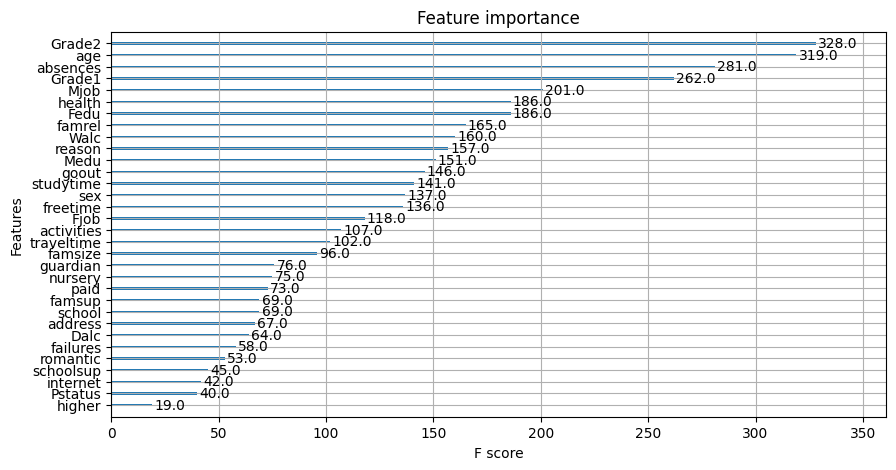

In [11]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBRegressor()

x = ds.drop('Final_Grade', axis = 1)
y = ds.Final_Grade

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [13]:
sel_cols = ['age', 'health', 'Mjob', 'absences', 'Fedu', 'studytime', 'Medu', 'reason', 'freetime','Walc','Final_Grade']
sel_data = ds[sel_cols]
sel_data

,age,health,Mjob,absences,Fedu,studytime,Medu,reason,freetime,Walc,Final_Grade
0,18,3,0,6,4,2,4,0,3,1,6
1,17,3,0,4,1,2,1,0,3,1,6
2,15,3,0,10,1,2,1,2,3,3,10
3,15,5,1,2,2,3,4,1,2,1,15
4,16,5,2,4,3,2,3,1,3,2,10
...,...,...,...,...,...,...,...,...,...,...,...
390,20,4,3,11,2,2,2,0,5,5,9
391,17,2,3,3,1,1,3,0,4,4,16
392,21,3,2,3,1,1,1,0,5,3,7
393,18,5,3,0,2,1,3,0,4,4,10


In [21]:
# Split Into Train and Test
x = sel_data.drop('Final_Grade', axis = 1)
y = sel_data.Final_Grade

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.10, random_state = 98)

MODEL SELECTION

In [20]:
def modeller(x_train, y_train, x_test, y_test, show_train_score = None):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.tree import DecisionTreeRegressor
    from xgboost import XGBRegressor
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import r2_score

    # list of algorithms to be used
    algorithms = [RandomForestRegressor(), XGBRegressor(), DecisionTreeRegressor(), SVC(kernel = 'poly'), LogisticRegression()]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(x_train, y_train)
        model_validate = model_name.predict(x_train)
        train_validator.append(r2_score(model_validate, y_train))

        test_perf = model_name.predict(x_test)
        scores.append(r2_score(test_perf, y_test))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]


table, model1, model2 = modeller(xtrain, ytrain, xtest, ytest, show_train_score = 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
1,"XGBRegressor(base_score=None, booster=None, ca...",0.864405,1.000000
0,"(DecisionTreeRegressor(max_features=1.0, rando...",0.859026,0.981272
4,LogisticRegression(),0.804324,0.925279
2,DecisionTreeRegressor(),0.719894,1.000000
3,SVC(kernel='poly'),0.481207,0.768893


MODELLING

In [22]:
# --------- XGBOOST Regressor MODELLING --------------
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb_model = XGBRegressor()

xgb_model.fit(xtrain, ytrain)

cross_validation = xgb_model.predict(xtrain)
print(r2_score(cross_validation, ytrain))

0.9995913586506082


In [24]:
# Export the model
joblib.dump(xgb_model, open('StudentGrade_model.pkl', "wb"))